In [1]:
# FILENAME : rv_curves.ipynb
# VERSION : python 2.7
# DESCRIPTION : plotting RV curves...finally!!
# AUTHOR : Chase Boggio


# GOAL: to read from .csv file and plot/save RV curves for all selected data
    # I want the plotting to be a function so I can iterate it as many times as I want

# INPUT : /Volumes/CoveyData/APOGEE_Spectra/Chase/eclbin/cleanEBs_RVtable.csv
# OUTPUT : saved RV curve plot in same folder

In [3]:
### READING IN THE FILE ###

# use the code from gausspy to read in .csv file
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import pandas as pd

ebsByRV = pd.read_csv('cleanEBs_RVtable.csv')

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print ebsByRV

     Unnamed: 0  Barycentric Correction  Julian Date   RV [km/s]   RV [lag]  \
0             0                11.55620  2457295.837  -52.940336   1.330814   
1             1                11.55620  2457295.837   95.855924  37.255550   
2             2                 1.83080  2457556.732  -31.870811   2.189815   
3             3                -7.63750  2457348.617  -12.619864  19.844202   
4             4                -7.63750  2457348.617  -97.135246  -0.563554   
5             5               -15.05100  2457374.559  -22.566899  17.676978   
6             6               -15.05100  2457374.559  -88.093319   1.854475   
7             7                11.95640  2457295.837   94.590525  -0.974285   
8             8                11.95640  2457295.837 -116.841138 -52.053761   
9             9                 1.90180  2457556.732   98.361202   0.054821   
10           10                 1.90180  2457556.732 -123.184827 -53.468313   
11           11                14.19260  2457297.918

In [4]:
import os
os.chdir("/Volumes/CoveyData/APOGEE_Spectra/Chase/eclbin/JacobSkinner_OrbitFitting")
import functions as f
os.chdir("/Volumes/CoveyData/APOGEE_Spectra/Chase/eclbin")


In [5]:
def simple(name):
    numTres = 0
    notACase = 0
    prim = list()
    secnd = list()
    prim_err = list()
    secnd_err = list()
    
    #go thru the list of RVs
    for i in range(len(ebsByRV['apogee_id'])):
        #does the name of the item match the input name?
        if ebsByRV['apogee_id'][i] == name:
            #YES
            #is there only 1 component?
            if ebsByRV['ncomp'][i] == 1:
                #YES
                print 'skipped'
                                
                #add the RV at this index to the prim list
                prim.append(ebsByRV['RV [km/s]'][i])
                #add the RV error at this index to the prim_err list
                prim_err.append(ebsByRV['RV error'][i])
                
                #THIS is a case where there is a single peak
                #aka an eclipse where the RV of both are equal
                #so can assign the RV to BOTH the prim and secnd
                secnd.append(ebsByRV['RV [km/s]'][i])
                secnd_err.append(ebsByRV['RV [km/s]'][i])
                
            #Are there 3 components?
            elif ebsByRV['ncomp'][i] == 3:
                #YES, well, we don't know what to do with this one just yet
                print "three"
            
            #Are there 2 components?
            else:
                #YES
                #is it the primary?
                if ebsByRV['component'][i] == 1:
                    #YES, then add the RV/RV error to prim/prim_err lists
                    prim.append(ebsByRV['RV [km/s]'][i])
                    prim_err.append(ebsByRV['RV error'][i])
                #is it the secondary?
                if ebsByRV['component'][i] == 2:
                    #YES, then add the RV/RV error to secnd/secnd_err lists
                    secnd.append(ebsByRV['RV [km/s]'][i])
                    secnd_err.append(ebsByRV['RV error'][i])
                    
    print numTres, notACase
    xyList = list()
    xyList.append(prim)
    xyList.append(secnd)
    xyList.append(prim_err)
    xyList.append(secnd_err)
    return xyList           


In [6]:
def plotter(x, y, x_err, y_err, name):
    xmin = min(x) - (0.2*abs(min(x)))
    ymin = min(y) - (0.2*abs(min(y)))
    xmax = max(x) + (0.2*abs(max(x)))
    ymax = max(y) + (0.2*abs(max(y)))
    
    err_x = []
    err_y = []
    
    for j in range(len(x_err)):
        err_x.append(x_err[j])
        err_y.append(y_err[j])    
    
    plt.plot(x, y, 'bo')
    model = linregress(primary,secondary)
    m = model.slope
    b = model.intercept
    
    slopeFit = list()
    
    for i in range(len(x)):
        slopeFit.append((m*x[i]) + b)
        
    plt.errorbar(x, y, xerr=err_x, yerr=err_y, ls='none')    
    plt.plot(x, slopeFit)
    plt.plot(x, x, "r--")
    plt.plot(y, y, 'g--')
    
    returnList = list()
    if m != 1:
        print "m is NOT 1"
        vCM = b/(1-m)
        plt.plot(vCM, vCM,'kD')
        plt.plot(vCM, vCM,'wd')
        
        returnList.append(name)
        returnList.append(m)
        returnList.append(vCM)
                
    #plt.axis([xmin, xmax, ymin, ymax])
    plt.xlabel('RV primary (km/s)')
    plt.ylabel('RV secondary (km/s)')
    ebName = 'Comparison of V_2 and V_1 for' + name
    plt.title(ebName)
    
    plt.show()
    
    return returnList

skipped
0 0
[-52.940335899999994, -31.870810600000002] 
[95.85592401, -31.870810600000002]
m is NOT 1


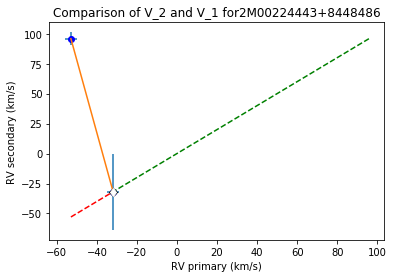

LinregressResult(slope=-6.062155306840256, intercept=-225.07661421209067, rvalue=-1.0, pvalue=0.0, stderr=0.0)
0 0
[-12.61986388, -22.56689941] 
[-97.135246, -88.09331861]
m is NOT 1


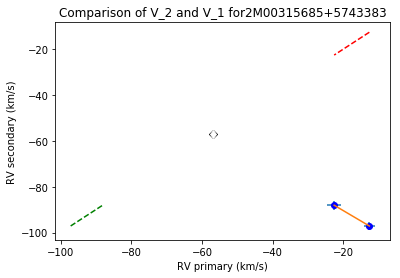

LinregressResult(slope=-0.9090072477101122, intercept=-108.60679373203504, rvalue=-1.0, pvalue=0.0, stderr=0.0)
0 0
[94.59052456, 98.36120198] 
[-116.8411378, -123.18482709999999]
m is NOT 1


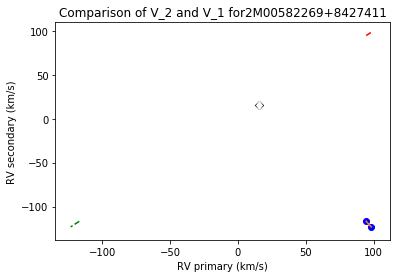

LinregressResult(slope=-1.6823739061720102, intercept=42.29549249086669, rvalue=-1.0, pvalue=0.0, stderr=0.0)
skipped
0 0
[36.38717779] 
[36.38717779]
can't plot, 1 epoch 

skipped
skipped
0 0
[63.59039026, -80.44535963] 
[63.59039026, -80.44535963]
DON'T TRUST THIS PLOT


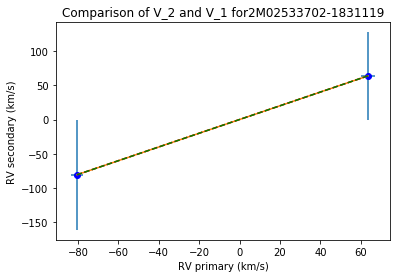

LinregressResult(slope=1.0, intercept=0.0, rvalue=1.0, pvalue=0.0, stderr=0.0)
plotter output is NONE
0 0
[95.74587544, -133.2447425, 42.16247344] 
[-148.27630290000002, 83.49064737, -99.78952588]
m is NOT 1


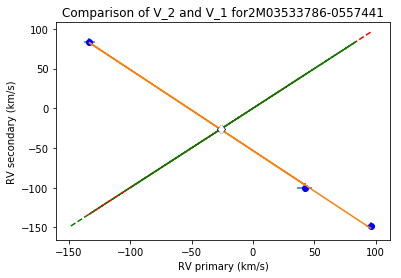

LinregressResult(slope=-1.0202570016404817, intercept=-53.27236811596993, rvalue=-0.999663409280635, pvalue=0.016518034611799792, stderr=0.026478007842003107)
skipped
skipped
0 0
[45.185532, 46.31057636] 
[45.185532, 46.31057636]
DON'T TRUST THIS PLOT


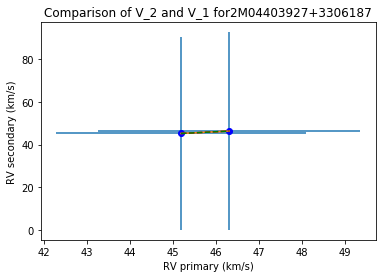

LinregressResult(slope=1.0, intercept=0.0, rvalue=1.0, pvalue=0.0, stderr=0.0)
plotter output is NONE
skipped
0 0
[13.15032613, -111.3293298, -40.52138124] 
[-73.6832391, -33.01102875, -40.52138124]
m is NOT 1


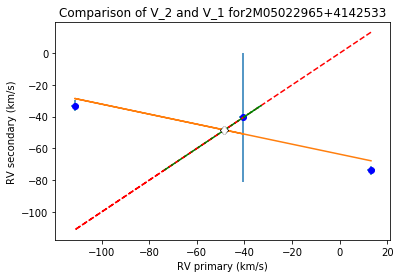

LinregressResult(slope=-0.31529004978055725, intercept=-63.64883345095212, rvalue=-0.9095823587047668, pvalue=0.27280333049833866, stderr=0.1440336678157895)
0 0
[-41.52442714, 63.43885898] 
[117.38923030000001, -72.45087091]
m is NOT 1


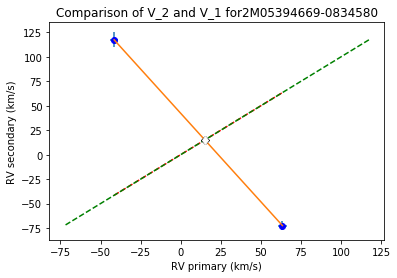

LinregressResult(slope=-1.8086333634120795, intercept=42.28676597802198, rvalue=-1.0, pvalue=0.0, stderr=0.0)
0 0
[-41.26808624] 
[102.8416739]
can't plot, 1 epoch 

skipped
0 0
[81.15909706] 
[81.15909706]
can't plot, 1 epoch 

three
three
three
0 0
[-78.10616853, 80.75229325, 97.86485001, 59.15138604] 
[57.17628622, -65.25452647, -72.22949525, -65.88971896]
m is NOT 1


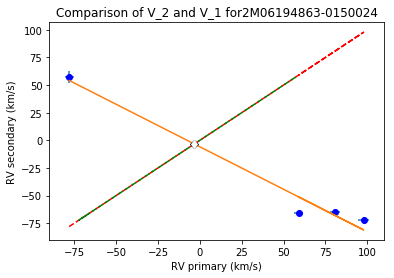

LinregressResult(slope=-0.7692618931484348, intercept=-5.843821137380356, rvalue=-0.9868570280234898, pvalue=0.013142971976510147, stderr=0.08907074453962839)
skipped
skipped
0 0
[17.75904864, -27.08610139, 16.16515397, -15.249463500000001, 65.17218503, 64.1549002] 
[114.480622, 162.325257, 114.878743, 145.4263568, 65.17218503, 64.1549002]
m is NOT 1


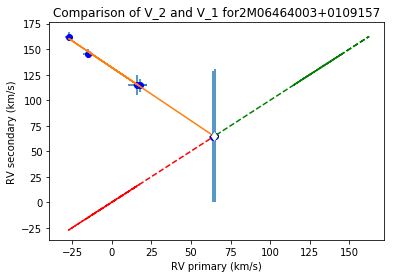

LinregressResult(slope=-1.0431287883812548, intercept=132.09478926784618, rvalue=-0.9991610494472086, pvalue=1.0554618023912437e-06, stderr=0.021377874009290504)
skipped
skipped
0 0
[-74.32714156, -37.85167123] 
[-74.32714156, -37.85167123]
DON'T TRUST THIS PLOT


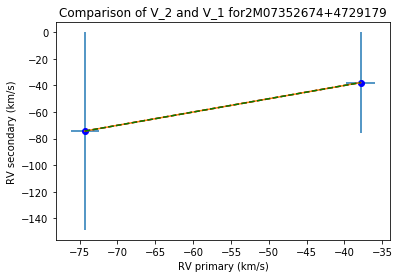

LinregressResult(slope=1.0, intercept=0.0, rvalue=1.0, pvalue=0.0, stderr=0.0)
plotter output is NONE
0 0
[-71.21274248, 109.08424440000002] 
[70.31742915, -101.1707652]
m is NOT 1


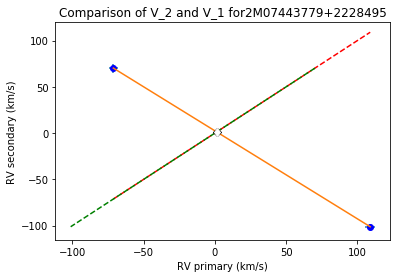

LinregressResult(slope=-0.9511428744182904, intercept=2.583936572363303, rvalue=-1.0, pvalue=0.0, stderr=0.0)
0 0
[10.04421765, -26.52996016] 
[87.02220716, 130.8033165]
m is NOT 1


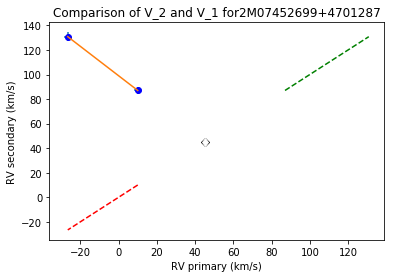

LinregressResult(slope=-1.1970497209107323, intercept=99.04563509469915, rvalue=-1.0, pvalue=0.0, stderr=0.0)
0 0
[59.25617368] 
[-35.65987826]
can't plot, 1 epoch 

0 0
[34.42855451] 
[-57.38439054]
can't plot, 1 epoch 

skipped
0 0
[-87.62704635, -2.253500945, 156.16889740000002] 
[51.94605815, -2.253500945, -21.67373665]
m is NOT 1


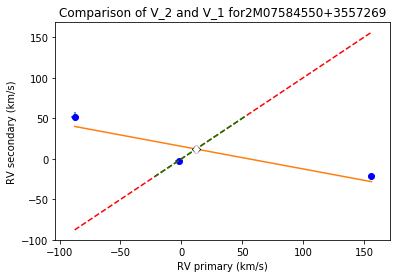

LinregressResult(slope=-0.27936446237271095, intercept=15.512476614552458, rvalue=-0.9057837490090334, pvalue=0.27856612673943437, stderr=0.13069120244362206)
0 0
[-154.1054706, 75.48473301] 
[71.47222791, -147.71905680000003]
m is NOT 1


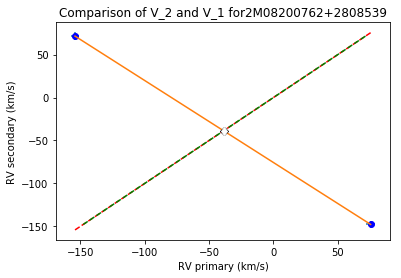

LinregressResult(slope=-0.9547066088339536, intercept=-75.65328332928652, rvalue=-1.0, pvalue=0.0, stderr=0.0)
skipped
0 0
[-107.7721218] 
[-107.7721218]
can't plot, 1 epoch 

skipped
0 0
[40.64815533, -55.09650213, -15.43905402] 
[40.64815533, 154.0254955, 78.37145208]
m is NOT 1


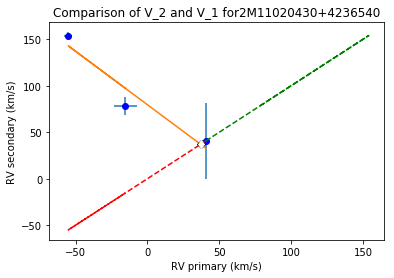

LinregressResult(slope=-1.1502130646447546, intercept=79.5560746728539, rvalue=-0.958370873953587, pvalue=0.18433678471149484, stderr=0.342681616706344)
0 0
[-45.52199661] 
[133.35866570000002]
can't plot, 1 epoch 

0 0
[-41.06831301, 60.17325604, -69.12494165] 
[23.5894564, -45.11621031, 106.846846]
m is NOT 1


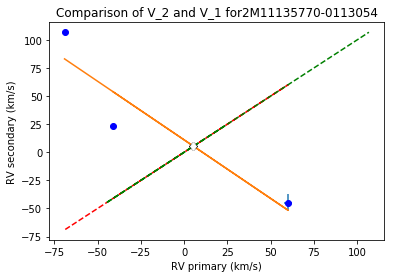

LinregressResult(slope=-1.0427052612965426, intercept=11.054658786293402, rvalue=-0.931936329619017, pvalue=0.23623673813550633, stderr=0.40572279623483704)
0 0
[88.1500105] 
[-66.05558988]
can't plot, 1 epoch 

0 0
[-88.94742092, 117.39556599999999] 
[99.18984415, -125.47321389999999]
m is NOT 1


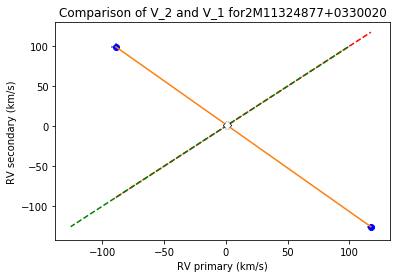

LinregressResult(slope=-1.0887845591626664, intercept=2.345265674961686, rvalue=-1.0, pvalue=0.0, stderr=0.0)
skipped
0 0
[-5.407195452000001, -130.5874331, 73.40342725] 
[-5.407195452000001, 118.38256499999999, -114.9464469]
m is NOT 1


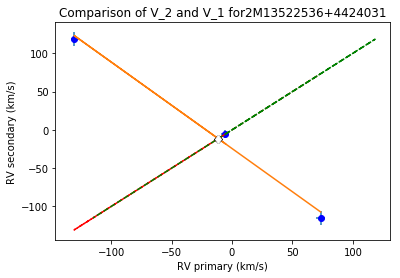

LinregressResult(slope=-1.1296573637503151, intercept=-24.225896269594205, rvalue=-0.9954675202678442, pvalue=0.060635537061753564, stderr=0.10792198136508076)
0 0
[83.7596471, 55.49825907] 
[-69.60715132, -69.57647342]
m is NOT 1


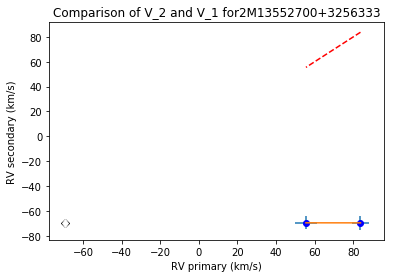

LinregressResult(slope=-0.0010855057779694127, intercept=-69.51622973911228, rvalue=-0.9999999999999999, pvalue=0.0, stderr=0.0)
0 0
[-62.8870925, -81.573135] 
[67.51549462, 98.73109398]
m is NOT 1


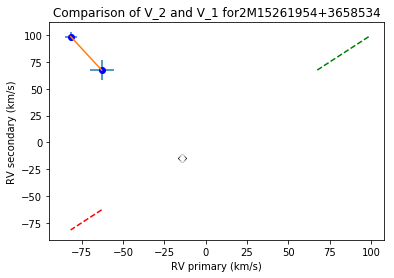

LinregressResult(slope=-1.670530255938357, intercept=-37.53929610924415, rvalue=-1.0, pvalue=0.0, stderr=0.0)
skipped
0 0
[-62.78791827, 65.11581887, -1.1189949670000001] 
[82.50474754, -121.1603987, -1.1189949670000001]
m is NOT 1


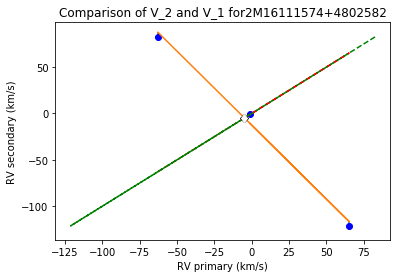

LinregressResult(slope=-1.5950419830125653, intercept=-12.61546362962154, rvalue=-0.9966181301570424, pvalue=0.052371623276589965, stderr=0.13151318171342855)
0 0
[-78.13740445, 138.89241299999998, 141.0016768, 120.89039809999998, 136.4910815, 132.83334140000002, -72.96608867, -52.99293948] 
[133.070826, -78.37624352, -79.5741676, -58.043671499999995, -72.04441948, -71.27035458, 152.32486609999998, 111.3721578]
m is NOT 1


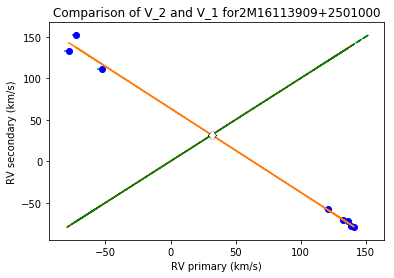

LinregressResult(slope=-1.011228843721848, intercept=63.588031588767365, rvalue=-0.9977445957555393, pvalue=2.863375248748547e-08, stderr=0.027773884065097197)
0 0
[-49.92124246] 
[110.0614544]
can't plot, 1 epoch 

three
three
three
0 0
[-114.14259209999999, -110.8785249] 
[39.43971772, 33.65253112]
m is NOT 1


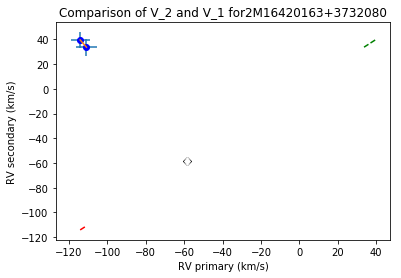

LinregressResult(slope=-1.7729986073816202, intercept=-162.9349391162283, rvalue=-1.0, pvalue=0.0, stderr=0.0)
skipped
0 0
[-158.12954480000002] 
[-158.12954480000002]
can't plot, 1 epoch 

0 0
[59.02590172] 
[-82.41432172]
can't plot, 1 epoch 

skipped
skipped
0 0
[98.02170193, 68.37939397, -80.40543037, 32.24469044, 62.09596315, -95.29102522, -123.3460898] 
[-37.95061227, -35.28714253, -80.40543037, 32.24469044, -29.54455627, -3.45333581, 1.000213718]
m is NOT 1


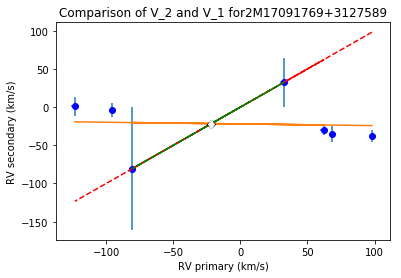

LinregressResult(slope=-0.02204628066657701, intercept=-22.03436616973782, rvalue=-0.05597437779124516, pvalue=0.9051237379232182, stderr=0.17586508909037532)
0 0
[38.68833755] 
[-2.200285446]
can't plot, 1 epoch 

0 0
[73.15743525] 
[-147.4515357]
can't plot, 1 epoch 

0 0
[41.61565113] 
[-81.50296108]
can't plot, 1 epoch 

0 0
[-46.95691199] 
[80.36777325]
can't plot, 1 epoch 

0 0
[-92.68481983, -114.20815929999999] 
[64.77844485, 117.2731072]
m is NOT 1


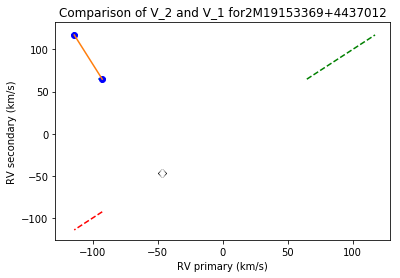

LinregressResult(slope=-2.438964567890078, intercept=-161.27654669664568, rvalue=-1.0, pvalue=0.0, stderr=0.0)
skipped
skipped
0 0
[-122.286, 26.49348072] 
[-122.286, 26.49348072]
DON'T TRUST THIS PLOT


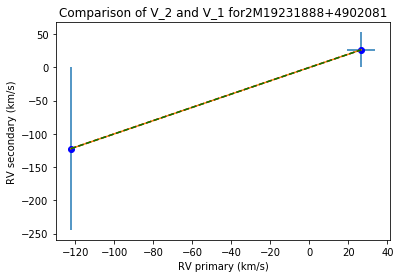

LinregressResult(slope=1.0, intercept=0.0, rvalue=1.0, pvalue=0.0, stderr=0.0)
plotter output is NONE
0 0
[5.18456196] 
[-100.9427524]
can't plot, 1 epoch 

0 0
[-61.45036531, -55.32532258] 
[109.17969699999999, 101.4616998]
m is NOT 1


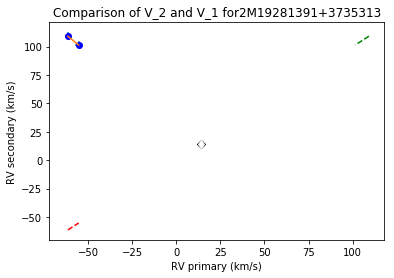

LinregressResult(slope=-1.2600723848337922, intercept=31.747788634920553, rvalue=-1.0, pvalue=0.0, stderr=0.0)
0 0
[43.45563125, 43.27562169] 
[-161.9607824, -163.9155805]
m is NOT 1


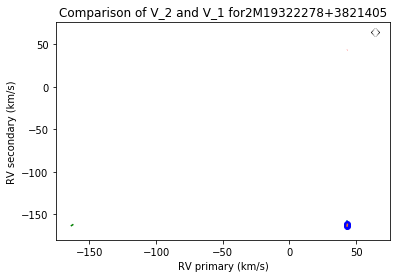

LinregressResult(slope=10.859412688970426, intercept=-633.8634158034698, rvalue=1.0, pvalue=0.0, stderr=0.0)
0 0
[-121.61661140000001] 
[-34.93499916]
can't plot, 1 epoch 

0 0
[12.60750819, 40.97707419, 34.46225999, -184.25923740000002] 
[-165.787583, -186.98168769999998, -189.7668282, 34.02643957]
m is NOT 1


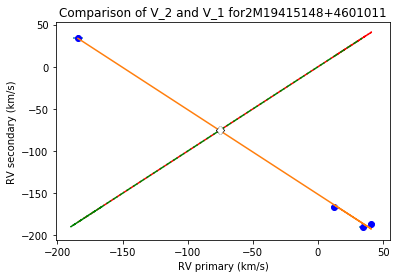

LinregressResult(slope=-1.003746529517803, intercept=-151.2706292344896, rvalue=-0.999310518707643, pvalue=0.0006894812923570194, stderr=0.026369990237372097)
0 0
[77.21034455] 
[-95.08229926]
can't plot, 1 epoch 

0 0
[99.48402184] 
[-108.37351969999999]
can't plot, 1 epoch 

0 0
[-55.89505228, -55.133291500000006, 78.4839223, -50.165316] 
[75.48203358, 74.51251664, -58.32940399, 70.78462101]
m is NOT 1


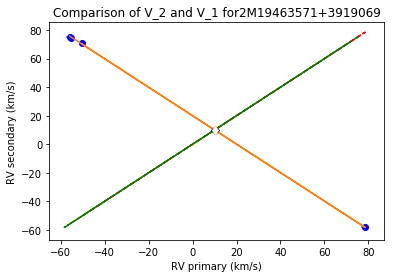

LinregressResult(slope=-0.997487042969084, intercept=19.986968944081397, rvalue=-0.9999669511509023, pvalue=3.304884909771655e-05, stderr=0.005734508462972935)
0 0
[64.3579553] 
[-98.39521585]
can't plot, 1 epoch 

0 0
[23.91244408] 
[-121.12116759999999]
can't plot, 1 epoch 

0 0
[-109.5096108, -22.00171839, -118.49258940000001] 
[25.40936518, -92.59111707, 31.79631752]
m is NOT 1


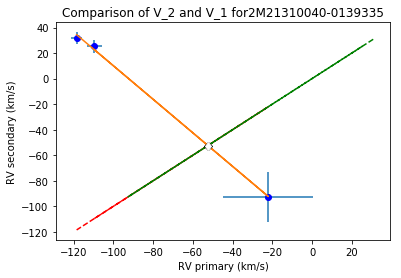

LinregressResult(slope=-1.3130297598074894, intercept=-121.21600651571961, rvalue=-0.9992492576417565, pvalue=0.02466992078268159, stderr=0.050907253500312284)
skipped
0 0
[-94.33302639, 22.00707645, -67.04834303] 
[31.84858516, -91.28350723, -67.04834303]
m is NOT 1


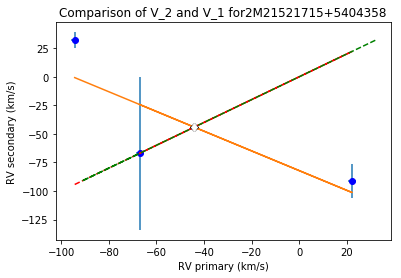

LinregressResult(slope=-0.863644740618339, intercept=-82.28438006698002, rvalue=-0.8055489809281298, pvalue=0.40374103628873376, stderr=0.635262075305479)
217 217 217


In [7]:
prevName = "banana"
goodNames = list()
massRatios = list()
vCMlist = list()
for i in range(len(ebsByRV['apogee_id'])):
    if prevName != ebsByRV['apogee_id'][i]:
        prevName = ebsByRV['apogee_id'][i]
        axesList = simple(prevName)
        primary = axesList[0][:]
        secondary = axesList[1][:]
        p_err = axesList[2][:]
        s_err = axesList[3][:]
        print primary, "\n", secondary
        
        
        
        if len(primary) == len(secondary):
            if not primary:
                
                print "the lists are empty \n"
            elif len(primary) == 1:
                print "can't plot, 1 epoch \n"
            else:
                if primary == secondary:
                    print "DON'T TRUST THIS PLOT"
                    
                output = plotter(primary, secondary, p_err, s_err, prevName)
                print linregress(primary,secondary)
                if not output:
                    print "plotter output is NONE"
                else:
                    goodNames.append(output[0])
                    massRatios.append(output[1])
                    vCMlist.append(output[2])
        else:
            print "the lists aren't the same length \n"

#Making columns that will be added to data frame
rvRatio = list()
cmrv = list()
#Go through the name column of the panda
for j in range(len(ebsByRV['apogee_id'])):
    #Is the name NOT on the goodNames list?
    if ebsByRV['apogee_id'][j] not in goodNames:
        #YES? Then we don't have a CM velocity or Mass ratio
        #add 'Not a Number' values to both lists
        rvRatio.append('NaN')
        cmrv.append('NaN')
    #So the name IS on the goodNames list?
    else:
        #Then go through the goodNames list
        for k in range(len(goodNames)):
            #Find the name that matches
            if ebsByRV['apogee_id'][j] == goodNames[k]:
                #add the Mass ratio and CM velocity to either list
                rvRatio.append(massRatios[k])
                cmrv.append(vCMlist[k])
                
print len(rvRatio), len(cmrv), len(ebsByRV['apogee_id'])

In [8]:
ebsByRV['Mass Ratio'] = rvRatio
ebsByRV['RV for CM [km/s]'] = cmrv

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print ebsByRV

     Unnamed: 0  Barycentric Correction  Julian Date   RV [km/s]   RV [lag]  \
0             0                11.55620  2457295.837  -52.940336   1.330814   
1             1                11.55620  2457295.837   95.855924  37.255550   
2             2                 1.83080  2457556.732  -31.870811   2.189815   
3             3                -7.63750  2457348.617  -12.619864  19.844202   
4             4                -7.63750  2457348.617  -97.135246  -0.563554   
5             5               -15.05100  2457374.559  -22.566899  17.676978   
6             6               -15.05100  2457374.559  -88.093319   1.854475   
7             7                11.95640  2457295.837   94.590525  -0.974285   
8             8                11.95640  2457295.837 -116.841138 -52.053761   
9             9                 1.90180  2457556.732   98.361202   0.054821   
10           10                 1.90180  2457556.732 -123.184827 -53.468313   
11           11                14.19260  2457297.918

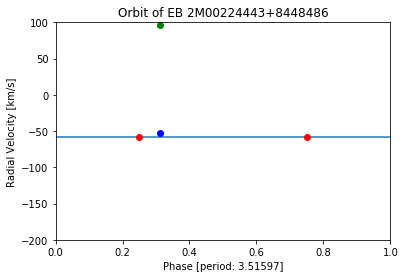

In [13]:
### LET'S JUST MAKE ONE PLOT ###

#red line for the RV of the CM of the system
plt.plot([0, 1], [-58.451, -58.451])

#blue point for the primary
plt.plot([545.84/1750], [-52.9403359], 'bo')

#green point for secondary
plt.plot([545.84/1750], [95.85592401], 'go')

#red points for eclipses
plt.plot([.25, .75], [-58.451, -58.451], 'ro')

plt.axis([0, 1, -200, 100])
plt.ylabel('Radial Velocity [km/s]')
plt.xlabel('Phase [period: 3.51597]')
plt.title('Orbit of EB 2M00224443+8448486')
plt.show()

In [12]:
### MAKING THE PLOT STUFF A FCN

# INPUTS : index --> for finding the RV in the .csv file
#          phaseRange --> the phase is 0 to 1, but we need to connect these to a date
#                          pRlow = julian at 0, pRhigh = julian at 1
#          eclipse --> the point in the phase where the 1st eclipse occurs
#                      we can just add 0.5 to get the other eclipse
# OUTPUTS : nothing? just printing the plots

def plotRVcurve(index, pRlow, pRhigh, eclipse, mn, mx):
    
    # Extracting variables
    #per EB
    ap_id = ebsByRV['apogee_id'][index]
    period = ebsByRV['period'][index]
    #per epoch
    julian = ebsByRV['Julian Date'][index]
    vhelio = ebsByRV['VHELIO'][index]
    primary = ebsByRV['RV [km/s]'][index]
    secondary = ebsByRV['RV [km/s]'][index + 1]
    
    phaseRange = pRhigh - pRlow
    rvInPhase = (julian - pRlow)/phaseRange
    
    #cyan line for the RV of the CM of the system
    plt.plot([0, 1], [ebsByRV['RV for CM [km/s]'][index], ebsByRV['RV for CM [km/s]'][index]])

    #blue point for the primary
    plt.plot([rvInPhase], [ebsByRV['RV [km/s]'][index]], 'bo')
    
    #green point for secondary
    plt.plot([rvInPhase], [ebsByRV['RV [km/s]'][index+1]], 'go')
    
    #red points for eclipses
    plt.plot([eclipse, eclipse + 0.5], [ebsByRV['RV for CM [km/s]'][index], ebsByRV['RV for CM [km/s]'][index]], 'ro')
    
    plt.axis([0, 1, mn, mx])
    plt.ylabel('Radial Velocity [km/s]')
    xtitle = 'Phase [period: ' + str(period) + ']'
    plt.xlabel(xtitle)
    plotTitle = 'Orbit of EB' + ap_id
    plt.title(plotTitle)
    plt.show()

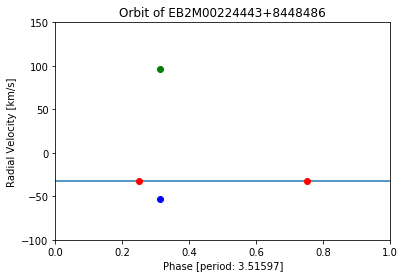

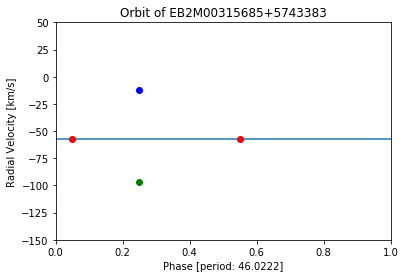

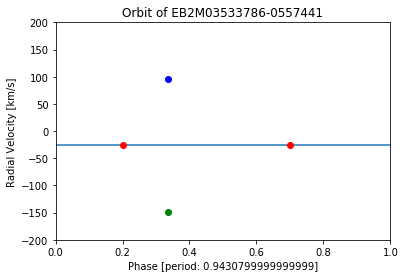

In [14]:

plotRVcurve(0, 2456750, 2458500, 0.25, -100, 150)

plotRVcurve(3, 2457000, 2458400, 0.05, -150, 50)

plotRVcurve(14, 2456750, 2458500, 0.2, -200, 200)